In [24]:
import cantera as ct
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import pandas as pd
import csv
import optunity

num_pts = 10#2000   # the number of points to generate
skip = 500    # the number of initial points of the Sobol sequence to skip
# generate Sobol sequence
x_sobol=np.zeros((num_pts, 40))
res = optunity.solvers.Sobol.i4_sobol_generate(40, num_pts, skip)

for i,j in enumerate(zip(*res)):
    x_sobol[:,i]=j
    
deltaH=10 #kJ/mol

dh = deltaH-2*x_sobol*deltaH

#111 facet
dh_co_111= np.round(dh[:,0],2)
dh_o_111=np.round(dh[:,1],2)

#100 facet
dh_co_100= np.round(dh[:,2],2)
dh_o_100=np.round(dh[:,3],2)


#110 facet
dh_co_110= np.round(dh[:,4],2)
dh_o_110=np.round(dh[:,5],2)

#211 facet
dh_co_211= np.round(dh[:,6],2)
dh_o_211=np.round(dh[:,7],2)


data=np.c_[dh_co_111,dh_o_111,
           dh_co_100,dh_o_100,
           dh_co_110,dh_o_110,
           dh_co_211,dh_o_211]

names = ['dh_co_111','dh_o_111',
         'dh_co_100','dh_o_100',
         'dh_co_110','dh_o_110',
         'dh_co_211','dh_o_211']


#df=pd.DataFrame(data, columns=[names])
#df.to_csv('sobol_samples.txt',sep="\t", index=False)

#[0.6923, 0.211, 0.0439, 0.0528, 0.0, 0.0, 0.0, 0.0] # [111, 100, 211, 110, edges...]

#Share=1-0.15*x_sobol[:,0]    
#Terrace_sites=x_sobol[:,0]*Share
#Step_sites=x_sobol[:,1]*(1-Share)

Fraction111=0.6923+0.35*(1-2*x_sobol[:,8])
Fraction100=0.211+0.15*(1-2*x_sobol[:,9])
Fraction211=0.0439+0.04*(1-2*x_sobol[:,10])
Fraction110=0.0528+0.04*(1-2*x_sobol[:,11])

normalized_facet_fraction=[]

for k in range(len(Fraction111)):
    facet_fraction=np.array([Fraction111[k],Fraction100[k],Fraction211[k],Fraction110[k], 0.0, 0.0, 0.0, 0.0]) # [111, 100, 211, 110, edges...]
    normalized_facet_fraction.append(facet_fraction/np.sum(facet_fraction))
    
normalized_facet_fraction=np.array(normalized_facet_fraction)
#print(normalized_facet_fraction[:,0])
print(normalized_facet_fraction)
#print('111', np.round(np.min(normalized_facet_fraction[:,0]),3), np.round(np.max(normalized_facet_fraction[:,0]),3))
#print('100', np.round(np.min(normalized_facet_fraction[:,1]),3), np.round(np.max(normalized_facet_fraction[:,1]),3))
#print('211', np.round(np.min(normalized_facet_fraction[:,2]),3), np.round(np.max(normalized_facet_fraction[:,2]),3))
#print('110', np.round(np.min(normalized_facet_fraction[:,3]),3), np.round(np.max(normalized_facet_fraction[:,3]),3))

[[0.69984177 0.25254703 0.02550416 0.02210705 0.         0.
  0.         0.        ]
 [0.82330098 0.07565588 0.05183896 0.04920418 0.         0.
  0.         0.        ]
 [0.66284565 0.22355913 0.00617796 0.10741726 0.         0.
  0.         0.        ]
 [0.677616   0.25394745 0.03552519 0.03291136 0.         0.
  0.         0.        ]
 [0.6902988  0.20501405 0.05413467 0.05055248 0.         0.
  0.         0.        ]
 [0.69372017 0.23851325 0.00682868 0.0609379  0.         0.
  0.         0.        ]
 [0.53456052 0.30679479 0.08123873 0.07740596 0.         0.
  0.         0.        ]
 [0.82692289 0.11572513 0.03035717 0.02699481 0.         0.
  0.         0.        ]
 [0.58854232 0.24322526 0.085888   0.08234442 0.         0.
  0.         0.        ]
 [0.85518902 0.07220192 0.03787339 0.03473566 0.         0.
  0.         0.        ]]


In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import pandas as pd
import matplotlib.gridspec as gridspec
#%matplotlib inline 

#Makes the diagrams look nice and shiny
plt.rcParams['figure.figsize']=(7,6)
plt.rcParams['axes.linewidth'] = 2
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rc('axes', labelsize=18)
plt.rc('legend', fontsize=18)
plt.rcParams['lines.markersize'] = 10
plt.rcParams['xtick.direction']='in'
plt.rcParams['ytick.direction']='in'
plt.rcParams['xtick.major.size']=10
plt.rcParams['xtick.major.width']=2
plt.rcParams['ytick.major.size']=10
plt.rcParams['ytick.major.width']=2
plt.rcParams['legend.edgecolor']='k'
plt.rcParams['axes.unicode_minus']=False
plt.rcParams["legend.framealpha"] = 1
plt.rcParams['xtick.major.pad'] = 8
plt.rcParams['ytick.major.pad'] = 8
plt.rcParams['legend.handletextpad']=0.4
plt.rcParams['legend.columnspacing']=0.5
plt.rcParams['legend.labelspacing']=0.3
plt.rcParams['legend.title_fontsize'] = 14
plt.rcParams['axes.formatter.limits']=(-3, 6)

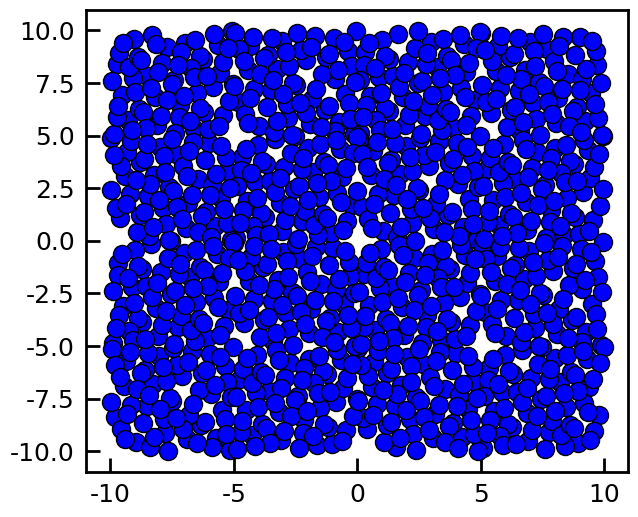

In [12]:
colormap=plt.cm.Dark2
colors = [colormap(i) for i in np.linspace(0, 1, 4)]

gs=gridspec.GridSpec(nrows=1, ncols=1)
gs.update(wspace=0.15, hspace=0.15)

ax0=plt.subplot(gs[0,0])
    
#avg_spcs1=np.mean(data_spcs1.iloc[:,1])
#avg_spcs2=np.mean(data_spcs2.iloc[:,1])
ax0.plot(dh[:,0],dh[:,1] ,  color='b', marker='o', linestyle='None', markersize=13,markeredgecolor='k',
              label='$\mathrm{mean}$')
#ax0.plot(data_spcs1.iloc[:,1], data_spcs2.iloc[:,1],  marker='o', linestyle='None', markersize=7, 
#              markerfacecolor='b',markeredgewidth=0, alpha=0.3, zorder=1)

# xlabel='$\mathrm{'+ str(spcs1) + '^*\ heat\ of\ formation\ (kJ\, mol^{-1})}$'
# ylabel='$\mathrm{'+ str(spcs2) + '^*\ heat\ of\ formation\ (kJ\, mol^{-1})}$'
# ax0.set_xlabel(xlabel)
# ax0.set_ylabel(ylabel)
# ax0.set_xlim([avg_spcs1-40, avg_spcs1+40])
# ax0.set_ylim([avg_spcs2-40, avg_spcs2+40])
    
#png_name='bee_scatter_' + str(spcs1) + '_' + str(spcs2) + '.png'
#plt.savefig(png_name, dpi=300, bbox_inches='tight', transparent=True)
    
plt.show()


NameError: name 'st' is not defined

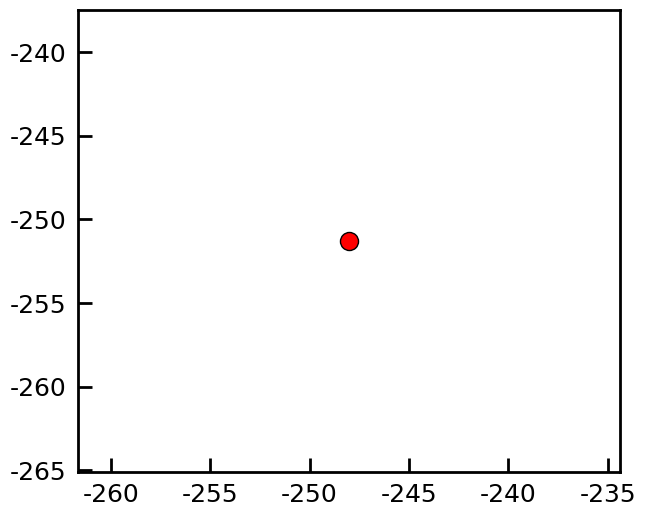

In [8]:
def plot_bee(spcs1, spcs2):
    
    gs=gridspec.GridSpec(nrows=1, ncols=1)
    gs.update(wspace=0.15, hspace=0.15)

    ax0=plt.subplot(gs[0,0])
    
    rel_dir='dft-data/Ni111/ensembles/'
    file='_ads_bee.txt'
    
    fname1=rel_dir + str(spcs1) +file
    fname2=rel_dir + str(spcs2) +file
    data_spcs1=pd.read_csv(fname1, sep="\t", header=0)
    data_spcs2=pd.read_csv(fname2, sep="\t", header=0)
    avg_spcs1=np.mean(data_spcs1.iloc[:,1])
    avg_spcs2=np.mean(data_spcs2.iloc[:,1])
    ax0.plot(avg_spcs1,avg_spcs2 ,  color='k', marker='o', linestyle='None', markersize=13,markeredgecolor='k',
             label='$\mathrm{mean}$')
    ax0.plot(data_spcs1.iloc[:,1], data_spcs2.iloc[:,1],  marker='o', linestyle='None', markersize=7, 
             markerfacecolor='b',markeredgewidth=0, alpha=0.3, zorder=1)

    xlabel='$\mathrm{'+ str(spcs1) + '^*\ heat\ of\ formation\ (kJ\, mol^{-1})}$'
    ylabel='$\mathrm{'+ str(spcs2) + '^*\ heat\ of\ formation\ (kJ\, mol^{-1})}$'
    ax0.set_xlabel(xlabel)
    ax0.set_ylabel(ylabel)
    ax0.set_xlim([avg_spcs1-50, avg_spcs1+50])
    ax0.set_ylim([avg_spcs2-50, avg_spcs2+50])
    
    #png_name='bee_scatter_' + str(spcs1) + '_' + str(spcs2) + '.png'
    #plt.savefig(png_name, dpi=300, bbox_inches='tight', transparent=True)
    
    plt.show()
    
def plot_bee_contour(spcs1,spcs2):
    gs=gridspec.GridSpec(nrows=1, ncols=1)
    gs.update(wspace=0.15, hspace=0.15)
    
    ax0=plt.subplot(gs[0,0])
    
    rel_dir='dft-data/Ni111/ensembles/'
    file='_ads_bee.txt'
    fname1=rel_dir + str(spcs1) +file
    fname2=rel_dir + str(spcs2) +file
    data_spcs1=pd.read_csv(fname1, sep="\t", header=0)
    data_spcs2=pd.read_csv(fname2, sep="\t", header=0)
    avg_spcs1=np.mean(data_spcs1.iloc[:,1])
    avg_spcs2=np.mean(data_spcs2.iloc[:,1])
    ax0.plot(avg_spcs1,avg_spcs2 ,  color='r', marker='o', linestyle='None', markersize=13,markeredgecolor='k', label='$\mathrm{mean}$')
  
    x=data_spcs1.iloc[:,1].to_numpy()
    y=data_spcs2.iloc[:,1].to_numpy()

    deltaX=(max(x)-min(x))/10
    deltaY=(max(y)-min(y))/10

    xmin=min(x)
    xmax=max(x)

    ymin=min(y)
    ymax=max(y)

    #Create the meshgrid
    xx,yy=np.mgrid[xmin:xmax:100j, ymin:ymax:100j]

    positions=np.vstack([xx.ravel(),yy.ravel()])
    values=np.vstack([x,y])
    kernel=st.gaussian_kde(values)
    f=np.reshape(kernel(positions).T,xx.shape)

    cfset=ax0.contourf(xx,yy,f,6,cmap='Blues', extend='both')
    cfset.changed()
    cset=ax0.contour(xx,yy,f*1e2,6,colors='k')
    cfset.cmap.set_over('blue')
    cfset.cmap.set_under('white')

    xlabel='$\mathrm{'+ str(spcs1) + '^*\ heat\ of\ formation\ (kJ\, mol^{-1})}$'
    ylabel='$\mathrm{'+ str(spcs2) + '^*\ heat\ of\ formation\ (kJ\, mol^{-1})}$'
    ax0.set_xlabel(xlabel)
    ax0.set_ylabel(ylabel)
    ax0.set_xlim([avg_spcs1-40, avg_spcs1+40])
    ax0.set_ylim([avg_spcs2-40, avg_spcs2+40])
    
    png_name='bee_contour_' + str(spcs1) + '_' + str(spcs2) + '.png'
    plt.savefig(png_name, dpi=300, bbox_inches='tight', transparent=True)
    
    plt.show()
    
plot_bee_contour('CO','O')